# **DataCure Team**

# Project Title: Diabetes Prediction Model Using Health and Demographic Data

## Problem Definition

Diabetes is a growing health concern worldwide, impacting millions of lives and increasing the burden on healthcare systems. Early detection of diabetes can improve patient outcomes and help healthcare providers allocate resources more effectively. This project aims to develop a binary classification model that predicts whether an individual is likely to have diabetes (Yes or No) based on their health data, lifestyle factors, and demographic information.

## Objective

The primary objective of this project is to create a machine learning model that accurately predicts diabetes status using structured health data. The final model will be deployed as a Streamlit web application, allowing users to input patient data and receive instant predictions.


## Dataset Description

The dataset used for this project is obtained from the UCI Repository. It contains health and demographic data of individuals, with each row representing a single person’s record.
Features:
1. **HighBP:** Whether the individual has high blood pressure (1: Yes, 0: No).
2. **HighChol:** Whether the individual has high cholesterol (1: Yes, 0: No).
3. **CholCheck:** Cholesterol check in the last 5 years (1: Yes, 0: No).
4. **BMI:** Body Mass Index (numerical).
5. **Smoker:** Smoking status (1: Smoker, 0: Non-smoker).
6. **Stroke:** History of stroke (1: Yes, 0: No).
7. **HeartDiseaseorAttack:** activity engagement (1: Yes, 0: No).
9. **Fruits:** Frequency of fruit consumption (1: Yes, 0: No).
10. **Veggies:** Frequency of vegetable consumption (1: Yes, 0: No).
11. **HvyAlcoholConsump:** Heavy alcohol consumption status (1: Yes, 0: No).
12. **AnyHealthcare:** Access to healthcare services (1: Yes, 0: No).
13. **NoDocbcCost:** Couldn’t see a doctor due to cost (1: Yes, 0: No).
14. **GenHlth:** General health rating (1: Excellent, ..., 5: Poor).
15. **MentHlth:** Number of days of poor mental health in the past month.
16. **PhysHlth:** Number of days of poor physical health in the past month.
17. **DiffWalk:** Difficulty walking or climbing stairs (1: Yes, 0: No).
18. **Sex:** Biological sex (1: Male, 0: Female).
19. **Age:** Age category (1: 18–24, ..., 13: 80+).
20. **Education:** Education level (1: No high school, ..., 6: College graduate).
21. **Income:** Income level (1: <$10k, ..., 8: $75k+).
22. **Outcome:** Target variable indicating diabetes status (1: Yes, 0: No).


## Data Collection

The dataset was sourced from the UCI Repository. It was downloaded as a CSV file and loaded into Jupyter Noebook for analysis.

#### Laoding the Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#### Loading Dataset

In [18]:
df = pd.read_csv('diabetes.csv')

In [20]:
# using just 50,000 rows out of the entire dataset 

# Randomly sample 10,000 rows
df_sampled = df.sample(n=50000, random_state=42)

# Save or use the sampled data
df_sampled.to_csv('sampled_diabetes.csv', index=False)


In [22]:
# loading the new dataset 
df1 = pd.read_csv('sampled_diabetes.csv')

In [24]:
# checking the head
df1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,3.0,7.0,0.0,0.0,7.0,4.0,2.0
1,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,6.0,6.0
2,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,7.0
3,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,3.0,0.0,0.0,1.0,2.0,4.0,7.0
4,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,4.0,27.0,27.0,1.0,0.0,8.0,3.0,2.0


In [26]:
## checking the tail
df1.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
49995,0.0,1.0,0.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,4.0,6.0
49996,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,0.0,4.0,5.0,8.0
49997,0.0,0.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,4.0,8.0
49998,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,6.0,6.0,5.0
49999,0.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,14.0,14.0,1.0,0.0,13.0,5.0,7.0


#### Data Cleaning and Preprocessing

##### Basic structure

In [30]:
# Display general information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          50000 non-null  float64
 1   HighBP                50000 non-null  float64
 2   HighChol              50000 non-null  float64
 3   CholCheck             50000 non-null  float64
 4   BMI                   50000 non-null  float64
 5   Smoker                50000 non-null  float64
 6   Stroke                50000 non-null  float64
 7   HeartDiseaseorAttack  50000 non-null  float64
 8   PhysActivity          50000 non-null  float64
 9   Fruits                50000 non-null  float64
 10  Veggies               50000 non-null  float64
 11  HvyAlcoholConsump     50000 non-null  float64
 12  AnyHealthcare         50000 non-null  float64
 13  NoDocbcCost           50000 non-null  float64
 14  GenHlth               50000 non-null  float64
 15  MentHlth           

In [32]:
## checking the number of rows and columns 
df1.shape

(50000, 22)

In [34]:
# Listing all the columns
df1.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [36]:
# Renaming column
df1.rename(columns={'Diabetes_012': 'Outcome'},
          inplace=True, errors='raise')

In [38]:
#  Checking the statistical summary for numerical columns
df1.describe()

,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.29478,0.431820,0.425840,0.96214,28.428340,0.444160,0.040520,0.093900,0.754420,0.633460,...,0.951060,0.084520,2.509720,3.161820,4.215380,0.168200,0.440500,8.028360,5.049440,6.057420
std,0.69574,0.495335,0.494475,0.19086,6.598534,0.496877,0.197177,0.291692,0.430435,0.481864,...,0.215745,0.278169,1.069752,7.369564,8.706438,0.374048,0.496452,3.058088,0.981944,2.068122
min,0.00000,0.000000,0.000000,0.00000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.00000,0.000000,0.000000,1.00000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.00000,0.000000,0.000000,1.00000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.00000,1.000000,1.000000,1.00000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.00000,1.000000,1.000000,1.00000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [40]:
# Checking for missing values
df1.isnull().sum()

Outcome                 0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [42]:
# Checking the unique values for each column
for i in df1.columns:
    i = df1.value_counts(i)
    print(f'\n\n\nValues of {i}')




Values of Outcome
0.0    42165
2.0     6904
1.0      931
Name: count, dtype: int64



Values of HighBP
0.0    28409
1.0    21591
Name: count, dtype: int64



Values of HighChol
0.0    28708
1.0    21292
Name: count, dtype: int64



Values of CholCheck
1.0    48107
0.0     1893
Name: count, dtype: int64



Values of BMI
27.0    4872
26.0    3988
24.0    3854
25.0    3442
28.0    3182
        ... 
78.0       1
70.0       1
69.0       1
68.0       1
98.0       1
Name: count, Length: 76, dtype: int64



Values of Smoker
0.0    27792
1.0    22208
Name: count, dtype: int64



Values of Stroke
0.0    47974
1.0     2026
Name: count, dtype: int64



Values of HeartDiseaseorAttack
0.0    45305
1.0     4695
Name: count, dtype: int64



Values of PhysActivity
1.0    37721
0.0    12279
Name: count, dtype: int64



Values of Fruits
1.0    31673
0.0    18327
Name: count, dtype: int64



Values of Veggies
1.0    40501
0.0     9499
Name: count, dtype: int64



Values of HvyAlcoholConsump
0.0    4718

In [44]:
# Checking for duplicate rows
df1.duplicated().sum()

2007

We have about 2,007 duplicate rows from the sampled dataset. Hence we will remove them

In [47]:
# Removing duplicate rows
df1 = df1.drop_duplicates()

In [49]:
# Reconfirming if we still have duplicate rows
df1.duplicated().sum()

0

In [51]:
# checking the new shape of our data
df1.shape

(47993, 22)

After removing the duplicate rows, we now have 47,993 rows and 22 columns

### Exploratory Data Analysis (EDA)

##### Histograms to show distributions

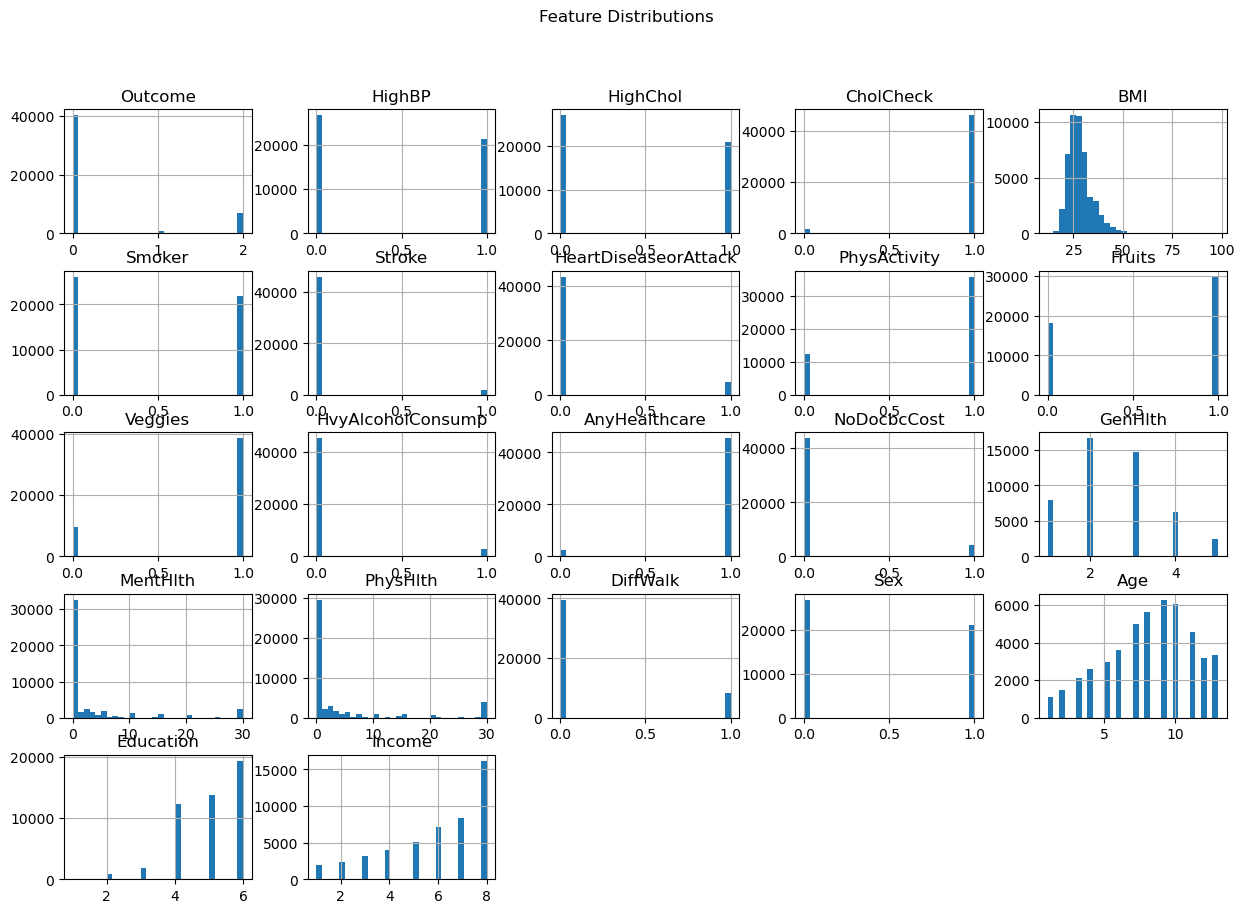

In [56]:
df1.hist(bins=30, figsize=(15, 10)) 
plt.suptitle('Feature Distributions') 
plt.savefig("Feature Distribution.png", dpi=300, bbox_inches='tight') # Save the plot 
plt.show()

##### Correlation matrix

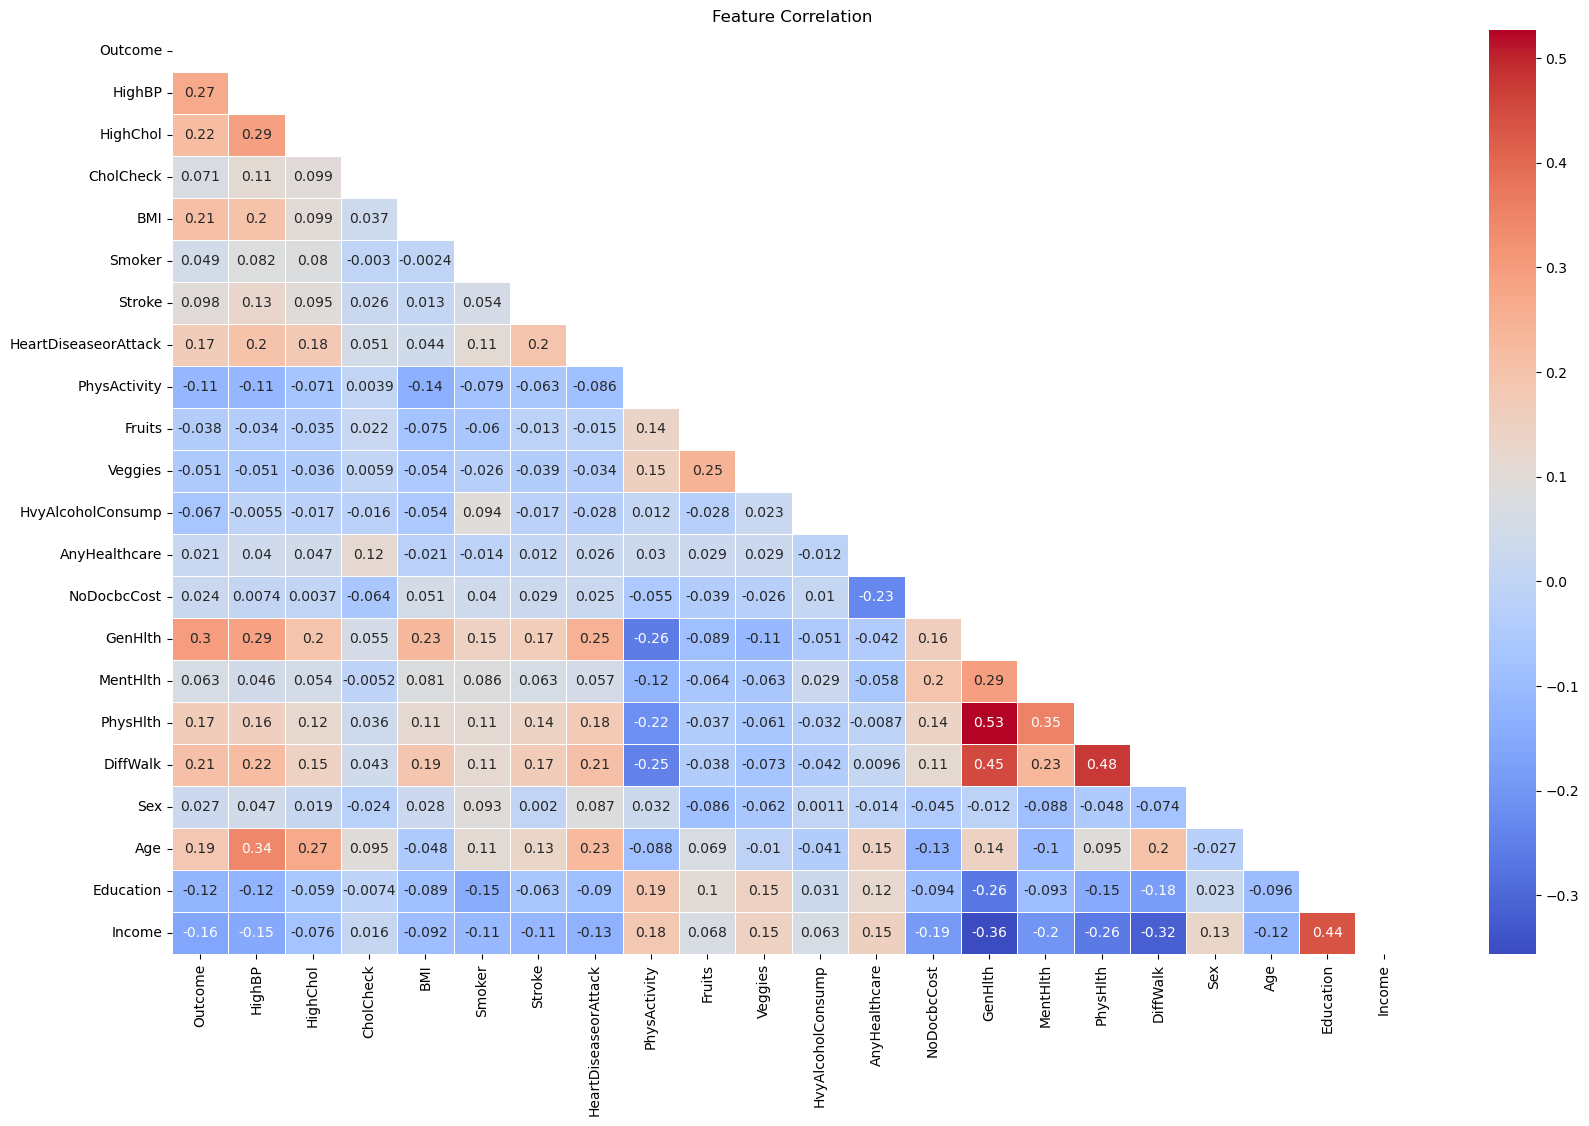

In [58]:
# using the upper triangle matrix as mask 
matrix = np.triu(df1.corr())

plt.figure(figsize=(20,12))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=matrix)
plt.title("Feature Correlation")
plt.savefig("Feature Correlation.png", dpi=300, bbox_inches='tight') # Save the plot 
plt.show()

#### Summary of Correlations with the Target Column (Outcome)
The following columns has a very strong or high correlation with the target columns; HighBP, BMI, Age, GenHlth, PhysHlth, HighChol. While the following column has low correlation with the target variable and hence has low impact in the prediction. They include; Smoker, Fruits & Veggies, HvyAlcoholConsump, Sex, AnyHealthcare, and CholCheck.

The following columns could be excluded since they have very low or no correlation with the target variable and are unlikely to impact predictions significantly include:
Smoker
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
Sex
CholCheck

### Feature Engineering

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [65]:
df1.head()

,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,3.0,7.0,0.0,0.0,7.0,4.0,2.0
1,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,6.0,6.0
2,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,7.0
3,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,3.0,0.0,0.0,1.0,2.0,4.0,7.0
4,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,4.0,27.0,27.0,1.0,0.0,8.0,3.0,2.0


In [67]:
df1.tail()

,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
49995,0.0,1.0,0.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,4.0,6.0
49996,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,0.0,4.0,5.0,8.0
49997,0.0,0.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,4.0,8.0
49998,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,6.0,6.0,5.0
49999,0.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,14.0,14.0,1.0,0.0,13.0,5.0,7.0


In [69]:
df1.columns

Index(['Outcome', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [71]:
# Prepare features and target
X = df1[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
        'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
        'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
y = df1['Outcome']

##### Train-Test Split

In [74]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Model Building and Evaluation

In [77]:
#Logistic Regression
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

# Random Forest Classifier
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

# Gradient Boosting Classifier
model_3 = GradientBoostingClassifier()
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

# Support Vector Classifier (SVC)
model_4 = SVC()
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)

# Function to print metrics for each model
def print_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Print metrics for each model
print_metrics(y_test, y_pred_1, "Logistic Regression")
print_metrics(y_test, y_pred_2, "Random Forest Classifier")
print_metrics(y_test, y_pred_3, "Gradient Boosting Classifier")
print_metrics(y_test, y_pred_4, "Support Vector Classifier")


Metrics for Logistic Regression:
Accuracy: 0.84
Precision: 0.80
Recall: 0.84
F1 Score: 0.80
Confusion Matrix:
[[7837    0  200]
 [ 190    0   12]
 [1107    0  253]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91      8037
         1.0       0.00      0.00      0.00       202
         2.0       0.54      0.19      0.28      1360

    accuracy                           0.84      9599
   macro avg       0.47      0.39      0.40      9599
weighted avg       0.80      0.84      0.80      9599


Metrics for Random Forest Classifier:
Accuracy: 0.84
Precision: 0.79
Recall: 0.84
F1 Score: 0.80
Confusion Matrix:
[[7821    4  212]
 [ 181    0   21]
 [1098    0  262]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      8037
         1.0       0.00      0.00      0.00       202
         2.0       0.53      0.19      0.28      1360

    accuracy    

C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: Undefine

## Summary of performances of the four models

1. **Support Vector Classifier (SVC)**: 
   - **Accuracy**: 0.84, **Precision**: 0.80, **Recall**: 0.84, **F1 Score**: 0.79.
   - Strong recall and decent precision, but its F1 score is slightly lower than other models, indicating less balanced performance. It has a good ability to correctly classify positive instances, but false negatives could be an issue.

2. **Gradient Boosting Classifier**: 
   - **Accuracy**: 0.85, **Precision**: 0.80, **Recall**: 0.85, **F1 Score**: 0.81.
   - The highest accuracy, recall, and F1 score among the models, making it a well-rounded performer. While computationally more intensive, its performance justifies its deployment if resources allow.

3. **Random Forest Classifier**: 
   - **Accuracy**: 0.84, **Precision**: 0.79, **Recall**: 0.84, **F1 Score**: 0.80.
   - Offers a good balance between accuracy and recall but performs slightly lower in precision than Gradient Boosting. It’s easier to deploy and less resource-intensive.

4. **Logistic Regression**: 
   - **Accuracy**: 0.84, **Precision**: 0.80, **Recall**: 0.84, **F1 Score**: 0.80.
   - While interpretable and simple to deploy, it performs similarly to SVC and Random Forest but lacks the extra performance boost seen in Gradient Boosting.

**Conclusion**: The **Gradient Boosting Classifier** was chosen as the best model for deployment due to its highest accuracy, recall, and F1 score, making it the most balanced and robust choice.

### Saving the best performing model

In [82]:
import joblib

In [84]:
joblib.dump(model_3, 'gradient_boosting.joblib')
print("Gradient Boosting model has been saved successfully as gradient_boosting.joblib")

Gradient Boosting model has been saved successfully as gradient_boosting.joblib


In [86]:
## Saving scaler object for deployment
scaler_name = 'scaler.joblib'
joblib.dump(scaler, scaler_name)
print("Scaler has been saved successfully as scaler_object.joblib")

Scaler has been saved successfully as scaler_object.joblib
